# Prep 5G TPM data for iModulons
1. Take the log of the TPMs
1. Get the average value for the uMax condition
1. Subtract average uMax value from remaining samples
1. Save this DF
1. Average by condition and also save this DF


In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import utils as u
import torch_utils as tu

Matplotlib is building the font cache; this may take a moment.


In [10]:
upstream_region_file = 'all_proms/all_loci_upstream_regions_w300_min20.fa'
op_file = 'all_proms/loci_in_top_100perc.txt'
data_mat_file = 'data/extract_TPM_counts.tsv'
sample2cond_file = 'data/sample2condition.txt'
sample_file = None
condition_file = 'data/conditions_to_include_iMod.txt'
coded_meta_file = 'data/5G_exp_metadata_coded.tsv'

COND_COLS = ['carbon_source','oxygen_level','nitrate_level',
             'copper_level','lanthanum_level','growth_rate',
             'growth_mode']


loc2seq, op_leads, tpm_df, sample2condition, samples, conditions, sample_meta_df = u.load_data(
    upstream_region_file,
    op_file,
    data_mat_file, 
    sample2cond_file, 
    sample_file, 
    condition_file,
    coded_meta_file
)

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNTATTTAAGAAGGTAGCGAAGAGTAAATAGATGATATTATAAAAAAATTATGCCACTATACAGCAATCAAATCAGTGCCGGCATAATTGACATAAACCGGCGTTTATTCTATCATCCCGGATCTTTTTTATCCGTTTTTGTTAACAATCATCTGAACCAGGATTTAAGGC


In [11]:
conditions

['uMax',
 'lowO2_fast_growth',
 'lowCH4',
 'MeOH',
 'NoCu',
 'medCu',
 'highCu',
 'lowCu',
 'highO2_slow_growth',
 'NO3_lowO2_slow_growth',
 'WithLanthanum',
 'NoLanthanum',
 'LanzaTech',
 'aa3_KO',
 'crotonic_acid']

In [12]:
print('EQU24_RS19310' in op_leads)
print('EQU24_RS19315' in op_leads)

False
True


In [13]:
# save locus info separately - easier to use in other files
#tpm_df[['locus_tag','gene_symbol','product','type']].to_csv("data/locus2info.tsv",sep='\t',index=False)

In [14]:
locus_info_df = pd.read_csv("data/locus2info.tsv",sep='\t')
locus_info_df

,locus_tag,gene_symbol,product,type
0,EQU24_RS00005,dnaA,chromosomal replication initiator protein DnaA,CDS
1,EQU24_RS00010,NaN,DNA polymerase III subunit beta,CDS
2,EQU24_RS00015,recF,DNA replication/repair protein RecF,CDS
3,EQU24_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS
4,EQU24_RS00025,NaN,hypothetical protein,CDS
...,...,...,...,...
4208,EQU24_RS22135,mnmE,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS
4209,EQU24_RS22140,yidC,membrane protein insertase YidC,CDS
4210,EQU24_RS22145,yidD,membrane protein insertion efficiency factor YidD,CDS
4211,EQU24_RS22150,rnpA,ribonuclease P protein component,CDS


In [15]:
locus2info = u.make_info_dict(locus_info_df)
locus2info['EQU24_RS19315']

{'gene': 'pmoC',
 'product': 'methane monooxygenase/ammonia monooxygenase subunit C',
 'type': 'CDS'}

In [16]:
len(samples)

98

## Adjust gene expression with low TPMs

In [19]:
tpm_df[['locus_tag']+samples]

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,2.933003,6.033848,48.864921,52.197450,25.751902,34.928170,28.322788,28.461759,28.479425,...,38.557373,38.810668,37.444214,40.246006,40.100118,33.432274,39.880174,38.355431,30.247582,41.248441
1,EQU24_RS00010,1.607784,3.895284,51.315629,54.947425,37.216017,40.094206,27.387700,28.648564,26.498988,...,52.552767,52.461746,42.676553,49.210083,46.798476,48.142385,45.465136,46.498139,37.152951,52.902410
2,EQU24_RS00015,1.415515,2.549771,33.906257,29.979783,21.716802,27.871558,16.570863,15.562811,16.589291,...,31.350991,34.914128,21.479309,24.204682,22.171104,22.006566,22.658157,22.753325,19.407103,29.834124
3,EQU24_RS00020,3.200081,4.301580,64.584281,72.717824,53.032824,55.595529,36.795081,36.401903,37.513079,...,74.848501,80.850761,54.959319,64.911376,59.653059,64.648318,69.119079,65.643179,57.590223,68.306759
4,EQU24_RS00025,1.522728,3.797084,74.801354,62.709260,46.348014,57.992363,27.432559,30.380176,26.852591,...,50.324948,49.349547,34.539657,36.521074,37.789611,39.358066,38.992158,35.870964,41.462392,40.227192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,2.300157,3.217944,104.488835,103.864151,78.264069,59.685923,58.833576,57.223346,66.382013,...,70.918047,92.044879,20.691249,26.000334,20.753333,30.766617,22.101468,19.753259,20.027390,24.508375
4209,EQU24_RS22140,5.261582,12.526353,379.686212,401.742811,208.094267,210.820167,204.760175,204.759505,211.282600,...,328.789579,403.009110,105.587429,138.423469,100.648922,166.101675,96.169044,93.527806,89.780995,130.851229
4210,EQU24_RS22145,9.389775,21.072962,500.129230,495.262554,260.011454,331.355028,300.766500,309.148602,312.637538,...,301.203428,329.903989,69.198876,75.440610,62.460976,59.523445,47.641158,60.667488,55.739018,66.415222
4211,EQU24_RS22150,21.657488,42.254357,1191.565348,1232.784967,666.589153,860.248081,828.322141,819.209523,810.533604,...,550.448048,679.393946,202.139374,195.134615,214.993010,259.828426,134.795621,160.260255,174.197473,164.123473


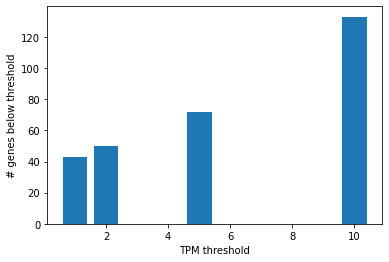

In [20]:
no_tx_genes1 = []
no_tx_genes2 = []
no_tx_genes5 = []
no_tx_genes10 = []
for i, row, in tpm_df.iterrows():
    tpms = row[samples].values
    if max(tpms) < 1.0:
        no_tx_genes1.append(row['locus_tag'])
    if max(tpms) < 2.0:
        no_tx_genes2.append(row['locus_tag'])
    if max(tpms) < 5.0:
        no_tx_genes5.append(row['locus_tag'])
    if max(tpms) < 10.0:
        no_tx_genes10.append(row['locus_tag'])

plt.bar([1,2,5,10],[len(no_tx_genes1),len(no_tx_genes2),len(no_tx_genes5),len(no_tx_genes10)])
plt.xlabel("TPM threshold")
plt.ylabel("# genes below threshold")
plt.show()

In [83]:
len(no_tx_genes1)

43

In [24]:
tpm_df[tpm_df['locus_tag'].isin(no_tx_genes1)][["locus_tag"]+samples]

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
122,EQU24_RS00625,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197961,0.000000,0.000000,0.029244
123,EQU24_RS00630,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,EQU24_RS00635,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
125,EQU24_RS00640,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.009871,0.008723,0.000000,0.009584,0.156194,0.035343,0.000000,0.215360
126,EQU24_RS00645,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.147113,0.000000,0.000000
276,EQU24_RS01445,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.034492,0.000000,0.000000,0.034311,0.046583,0.000000,0.000000
526,EQU24_RS02735,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
527,EQU24_RS02740,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
528,EQU24_RS02745,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
529,EQU24_RS02750,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [33]:
# set all genes with <1 TPM in all conditions to 0.
# this will help ensure that small relative changes of TPM values don't create giant log ratio values
adj_tpm_df = tpm_df.__deepcopy__()

for i, row in adj_tpm_df.iterrows():
    if row['locus_tag'] in no_tx_genes1:
        for s in samples:
            adj_tpm_df.loc[i,s] = 0.0

adj_tpm_df[adj_tpm_df['locus_tag'].isin(no_tx_genes1)][['locus_tag']+samples]

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
122,EQU24_RS00625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123,EQU24_RS00630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
124,EQU24_RS00635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,EQU24_RS00640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126,EQU24_RS00645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276,EQU24_RS01445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
526,EQU24_RS02735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
527,EQU24_RS02740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
528,EQU24_RS02745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
529,EQU24_RS02750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### take log of the tpm_df

In [35]:
# log 2 of the tpms with psuedocount
#log_tpm_df = np.log2(tpm_df[samples] + 0.01)
log_tpm_df = np.log2(adj_tpm_df[samples] + 0.01)
# meta data columns (not samples)
#meta_df = tpm_df[tpm_df.columns[~tpm_df.columns.isin(samples)]]
meta_df = adj_tpm_df[adj_tpm_df.columns[~adj_tpm_df.columns.isin(samples)]]
# smush meta and logged vals back together
log_tpm_df = pd.concat([meta_df, log_tpm_df],axis=1)
log_tpm_df.head()

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,...,5.269309,5.278753,5.227056,5.331132,5.325894,5.063601,5.317961,5.261735,4.919225,5.366617
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,...,5.715969,5.713469,5.415710,5.621175,5.548698,5.589535,5.507006,5.539411,5.215793,5.725534
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,...,4.970899,5.126152,4.425547,4.597810,4.471259,4.460518,4.502595,4.508639,4.279256,4.899375
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,...,6.226094,6.337368,5.780555,6.020622,5.898766,6.014764,6.111221,6.036793,5.848002,6.094168
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,...,5.653489,5.625257,5.110600,5.191052,5.240299,5.298954,5.285482,5.165147,5.374079,5.330458


In [36]:
# get the mean of the logged values for each condition
log_tpm_df_means = u.get_gene_means_by_condition(log_tpm_df,samples,sample2condition)
log_tpm_df_means.head()

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00025,EQU24_RS00030,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,...,EQU24_RS22110,EQU24_RS22115,EQU24_RS22120,EQU24_RS22125,EQU24_RS22130,EQU24_RS22135,EQU24_RS22140,EQU24_RS22145,EQU24_RS22150,EQU24_RS22155
0,LanzaTech,4.678877,5.795298,3.561389,6.264543,5.444950,4.794715,5.139060,4.687646,4.552295,...,12.856327,3.997509,3.992235,4.017643,3.213692,5.521138,8.468725,7.294139,9.158138,9.259922
1,MeOH,4.535638,4.227772,4.201007,4.176988,4.070103,3.576916,5.437073,3.254637,2.840722,...,10.308903,3.952667,4.307539,4.657686,4.365095,4.812940,6.502423,7.311239,8.919459,8.026209
2,NO3_lowO2_slow_growth,4.993152,5.438414,4.406897,5.954566,5.378743,4.994378,5.852303,4.072689,3.894680,...,12.637817,4.706588,4.853828,4.554499,4.719703,5.120607,7.469928,7.344060,8.750448,8.944359
3,NoCu,5.446921,5.880545,4.805624,5.815359,5.638454,5.250764,6.305145,5.316422,5.191032,...,12.985411,5.418971,5.094829,5.418883,5.048543,6.023467,7.964803,8.027433,9.473233,10.034635
4,NoLanthanum,5.028937,5.428379,4.519225,5.807097,5.394114,5.368935,6.489753,4.872911,4.270654,...,12.199036,4.007590,5.066007,5.476775,5.430085,4.403872,6.698421,6.048425,7.701581,8.346317


In [37]:
# put the conditions as the columns
log_tpm_df_meansT = log_tpm_df_means.set_index('exp_condition').T
log_tpm_df_meansT

exp_condition,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
locus_tag,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,4.678877,4.535638,4.993152,5.446921,5.028937,5.056599,5.110744,4.742944,5.274031,5.573513,5.995897,4.937488,5.400581,5.141100,3.117446,5.484672,5.185414,5.692640,3.746434
EQU24_RS00010,5.795298,4.227772,5.438414,5.880545,5.428379,5.236712,5.346253,5.506773,5.714719,6.293874,6.610619,5.038644,5.927308,5.418700,2.878822,6.019007,5.611599,5.895559,3.592704
EQU24_RS00015,3.561389,4.201007,4.406897,4.805624,4.519225,3.883959,4.326002,3.540662,5.048526,5.059846,5.474520,4.196587,4.827413,4.759295,2.194612,4.877122,4.092404,5.081055,3.092134
EQU24_RS00020,6.264543,4.176988,5.954566,5.815359,5.807097,5.695010,5.780471,5.802058,6.281731,6.189602,6.303382,5.408889,5.935105,5.600527,3.264681,6.028345,6.025920,6.143691,4.843888
EQU24_RS00025,5.444950,4.070103,5.378743,5.638454,5.394114,5.145553,5.082986,5.042143,5.639373,5.598345,6.242508,4.969610,5.655301,5.013012,2.718232,5.589111,5.472908,5.566137,4.263294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,5.521138,4.812940,5.120607,6.023467,4.403872,5.072960,4.394975,4.896295,6.336353,6.486981,5.698680,5.906325,6.049997,6.161572,2.762688,6.400936,4.913629,6.474245,4.850176
EQU24_RS22140,8.468725,6.502423,7.469928,7.964803,6.698421,7.422479,6.559458,7.506212,8.507885,8.419234,7.782292,7.820145,8.175158,8.352401,4.545885,8.406151,7.386697,8.745543,6.063722
EQU24_RS22145,7.294139,7.311239,7.344060,8.027433,6.048425,7.503533,6.132579,7.240339,8.300294,8.591087,7.916312,8.210203,8.243835,8.534490,5.140564,8.558719,7.532941,8.807329,6.190018


In [38]:
# melt ot make box plot
log_tpm_df_meansT_melt = pd.melt(log_tpm_df_meansT.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_tpm_df_meansT_melt

,locus_tag,exp_condition,tpm
0,EQU24_RS00005,LanzaTech,4.678877
1,EQU24_RS00010,LanzaTech,5.795298
2,EQU24_RS00015,LanzaTech,3.561389
3,EQU24_RS00020,LanzaTech,6.264543
4,EQU24_RS00025,LanzaTech,5.444950
...,...,...,...
80042,EQU24_RS22135,unknown,4.850176
80043,EQU24_RS22140,unknown,6.063722
80044,EQU24_RS22145,unknown,6.190018
80045,EQU24_RS22150,unknown,7.538324


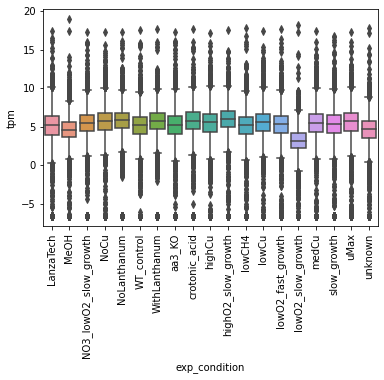

In [39]:
sns.boxplot(data=log_tpm_df_meansT_melt,x="exp_condition",y="tpm")
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.show()

### normalize the log TPM df to uMax condition by subtracting the uMax average for each gene

In [40]:
# copy the log tpm df
log_norm_uMax = log_tpm_df.copy(deep=True)
# for each sample, subtract the uMax mean value from the log value (log2 ratio (sample_val/umax_val))
for s in samples:
    log_norm_uMax[s] = log_norm_uMax[s].values - log_tpm_df_meansT['uMax'].values

log_norm_uMax

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200


In [41]:
# check a quick boxplot of log normed tpm data
log_norm_uMax_melt = pd.melt(log_norm_uMax[["locus_tag"]+samples], id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_norm_uMax_melt['cond'] = log_norm_uMax_melt['exp_condition'].apply(lambda x: sample2condition[x])
log_norm_uMax_melt

,locus_tag,exp_condition,tpm,cond
0,EQU24_RS00005,5GB1_ferm_Ack_QC_tpm,-4.135351,lowO2_slow_growth
1,EQU24_RS00010,5GB1_ferm_Ack_QC_tpm,-5.201540,lowO2_slow_growth
2,EQU24_RS00015,5GB1_ferm_Ack_QC_tpm,-4.569572,lowO2_slow_growth
3,EQU24_RS00020,5GB1_ferm_Ack_QC_tpm,-4.461081,lowO2_slow_growth
4,EQU24_RS00025,5GB1_ferm_Ack_QC_tpm,-4.950035,lowO2_slow_growth
...,...,...,...,...
412869,EQU24_RS22135,5GB1C-JG15-N-BR2_tpm,-1.858454,NoLanthanum
412870,EQU24_RS22140,5GB1C-JG15-N-BR2_tpm,-1.713649,NoLanthanum
412871,EQU24_RS22145,5GB1C-JG15-N-BR2_tpm,-2.753670,NoLanthanum
412872,EQU24_RS22150,5GB1C-JG15-N-BR2_tpm,-2.979200,NoLanthanum


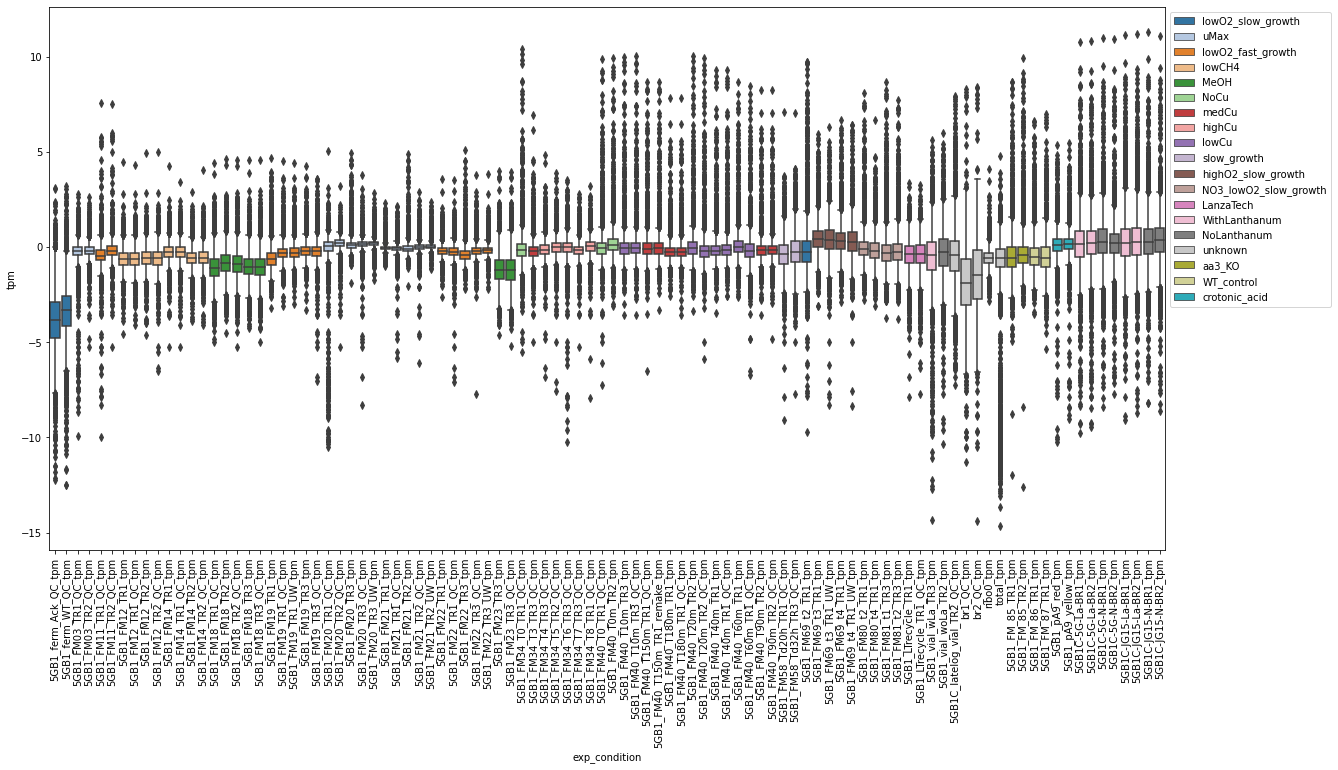

In [42]:
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=log_norm_uMax_melt,x="exp_condition",y="tpm",hue='cond',dodge=False,palette='tab20')
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

### Get the means of the log normed data

In [43]:
log_norm_uMax_means = u.get_gene_means_by_condition(log_norm_uMax,samples,sample2condition)
log_norm_uMax_means

locus_tag,exp_condition,EQU24_RS00005,EQU24_RS00010,EQU24_RS00015,EQU24_RS00020,EQU24_RS00025,EQU24_RS00030,EQU24_RS00035,EQU24_RS00040,EQU24_RS00045,...,EQU24_RS22110,EQU24_RS22115,EQU24_RS22120,EQU24_RS22125,EQU24_RS22130,EQU24_RS22135,EQU24_RS22140,EQU24_RS22145,EQU24_RS22150,EQU24_RS22155
0,LanzaTech,-1.013763e+00,-1.002613e-01,-1.519666e+00,1.208519e-01,-1.211870e-01,-1.119447e-01,-1.250900e+00,0.269591,4.007210e-01,...,-2.018197e-01,-1.428416e+00,-1.263288e+00,-1.453401e+00,-1.684150e+00,-9.531072e-01,-2.768182e-01,-1.513190e+00,-1.179788e+00,-1.121891e+00
1,MeOH,-1.157002e+00,-1.667787e+00,-8.800482e-01,-1.966703e+00,-1.496034e+00,-1.329744e+00,-9.528869e-01,-1.163417,-1.310852e+00,...,-2.749244e+00,-1.473258e+00,-9.479845e-01,-8.133584e-01,-5.327477e-01,-1.661306e+00,-2.243120e+00,-1.496090e+00,-1.418467e+00,-2.355604e+00
2,NO3_lowO2_slow_growth,-6.994879e-01,-4.571448e-01,-6.741588e-01,-1.891252e-01,-1.873941e-01,8.771809e-02,-5.376570e-01,-0.345365,-2.568934e-01,...,-4.203294e-01,-7.193371e-01,-4.016956e-01,-9.165452e-01,-1.781398e-01,-1.353638e+00,-1.275615e+00,-1.463269e+00,-1.587478e+00,-1.437454e+00
3,NoCu,-2.457192e-01,-1.501390e-02,-2.754318e-01,-3.283322e-01,7.231724e-02,3.441043e-01,-8.481445e-02,0.898367,1.039458e+00,...,-7.273537e-02,-6.953623e-03,-1.606939e-01,-5.216141e-02,1.507006e-01,-4.507783e-01,-7.807403e-01,-7.798968e-01,-8.646934e-01,-3.471779e-01
4,NoLanthanum,-6.637038e-01,-4.671795e-01,-5.618308e-01,-3.365938e-01,-1.720230e-01,4.622751e-01,9.979350e-02,0.454857,1.190803e-01,...,-8.591106e-01,-1.418335e+00,-1.895164e-01,5.730532e-03,5.322423e-01,-2.070373e+00,-2.047122e+00,-2.758904e+00,-2.636345e+00,-2.035496e+00
5,WT_control,-6.360409e-01,-6.588465e-01,-1.197097e+00,-4.486812e-01,-4.205836e-01,-1.739605e-01,-5.527362e-01,0.212874,6.389087e-01,...,-8.086109e-01,-1.346036e+00,-8.905748e-01,-5.054296e-01,5.463028e-01,-1.401285e+00,-1.323064e+00,-1.303797e+00,-1.681320e+00,-1.043121e+00
6,WithLanthanum,-5.818968e-01,-5.493058e-01,-7.550531e-01,-3.632195e-01,-4.831506e-01,5.513678e-01,2.428409e-01,0.347248,2.395080e-02,...,-1.151591e+00,-1.484962e+00,-2.210601e-01,1.415469e-01,3.688750e-01,-2.079270e+00,-2.186085e+00,-2.674750e+00,-2.779149e+00,-2.068555e+00
7,aa3_KO,-9.496967e-01,-3.887858e-01,-1.540393e+00,-3.416331e-01,-5.239937e-01,-6.991761e-02,-7.553323e-01,0.008238,4.790821e-01,...,-7.071067e-01,-1.436123e+00,-9.080372e-01,-6.581238e-01,4.463793e-01,-1.577950e+00,-1.239331e+00,-1.566991e+00,-1.805138e+00,-1.039685e+00
8,crotonic_acid,-4.186094e-01,-1.808398e-01,-3.252966e-02,1.380402e-01,7.323593e-02,3.149068e-01,-2.701582e-01,0.573402,1.012569e+00,...,2.463634e-02,-3.337775e-02,3.259495e-01,4.041620e-01,5.281675e-01,-1.378920e-01,-2.376586e-01,-5.070352e-01,-1.081619e+00,-9.830047e-01
9,highCu,-1.191272e-01,3.983154e-01,-2.120915e-02,4.591150e-02,3.220758e-02,1.366023e-01,1.408995e-01,1.271947,1.473417e+00,...,-6.895150e-02,1.551855e-01,-1.518382e-01,4.933591e-03,-3.394426e-02,1.273525e-02,-3.263091e-01,-2.162421e-01,-3.435036e-01,3.366015e-01


In [44]:
log_norm_uMax_meansT = log_norm_uMax_means.set_index('exp_condition').T
log_norm_uMax_meansT

exp_condition,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
locus_tag,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-1.013763,-1.157002,-0.699488,-0.245719,-0.663704,-0.636041,-0.581897,-0.949697,-0.418609,-0.119127,0.303257,-0.755152,-0.292059,-0.551540,-2.575194,-0.207968,-0.507227,-9.621933e-16,-1.946206
EQU24_RS00010,-0.100261,-1.667787,-0.457145,-0.015014,-0.467179,-0.658847,-0.549306,-0.388786,-0.180840,0.398315,0.715060,-0.856915,0.031749,-0.476859,-3.016737,0.123448,-0.283960,-2.220446e-16,-2.302855
EQU24_RS00015,-1.519666,-0.880048,-0.674159,-0.275432,-0.561831,-1.197097,-0.755053,-1.540393,-0.032530,-0.021209,0.393465,-0.884468,-0.253642,-0.321760,-2.886444,-0.203934,-0.988652,-4.440892e-16,-1.988922
EQU24_RS00020,0.120852,-1.966703,-0.189125,-0.328332,-0.336594,-0.448681,-0.363220,-0.341633,0.138040,0.045912,0.159691,-0.734801,-0.208586,-0.543164,-2.879010,-0.115346,-0.117771,-6.661338e-16,-1.299803
EQU24_RS00025,-0.121187,-1.496034,-0.187394,0.072317,-0.172023,-0.420584,-0.483151,-0.523994,0.073236,0.032208,0.676371,-0.596527,0.089164,-0.553125,-2.847905,0.022974,-0.093229,-1.036208e-15,-1.302843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,-0.953107,-1.661306,-1.353638,-0.450778,-2.070373,-1.401285,-2.079270,-1.577950,-0.137892,0.012735,-0.775565,-0.567920,-0.424248,-0.312673,-3.711558,-0.073309,-1.560616,7.401487e-16,-1.624069
EQU24_RS22140,-0.276818,-2.243120,-1.275615,-0.780740,-2.047122,-1.323064,-2.186085,-1.239331,-0.237659,-0.326309,-0.963252,-0.925398,-0.570385,-0.393142,-4.199658,-0.339392,-1.358846,2.960595e-16,-2.681821
EQU24_RS22145,-1.513190,-1.496090,-1.463269,-0.779897,-2.758904,-1.303797,-2.674750,-1.566991,-0.507035,-0.216242,-0.891018,-0.597127,-0.563494,-0.272840,-3.666766,-0.248610,-1.274388,1.184238e-15,-2.617311


In [45]:
# check a quick boxplot of mean tpm data
log_norm_uMax_meansT_melt = pd.melt(log_norm_uMax_meansT.reset_index(), id_vars=['locus_tag'],var_name="exp_condition",value_name='tpm')
log_norm_uMax_meansT_melt

,locus_tag,exp_condition,tpm
0,EQU24_RS00005,LanzaTech,-1.013763
1,EQU24_RS00010,LanzaTech,-0.100261
2,EQU24_RS00015,LanzaTech,-1.519666
3,EQU24_RS00020,LanzaTech,0.120852
4,EQU24_RS00025,LanzaTech,-0.121187
...,...,...,...
80042,EQU24_RS22135,unknown,-1.624069
80043,EQU24_RS22140,unknown,-2.681821
80044,EQU24_RS22145,unknown,-2.617311
80045,EQU24_RS22150,unknown,-2.799602


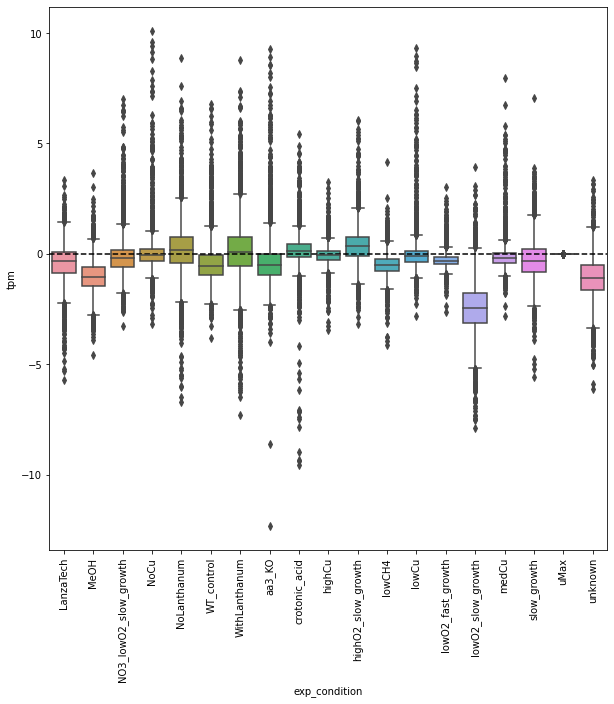

In [46]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=log_norm_uMax_meansT_melt,x="exp_condition",y="tpm")
#plt.ylim(-1,1000)
plt.xticks(rotation=90)
plt.axhline(0,c='k',linestyle='--')
plt.show()

In [47]:
# spot check the logged vs subtracted values
log_tpm_df_meansT['uMax']

locus_tag
EQU24_RS00005     5.692640
EQU24_RS00010     5.895559
EQU24_RS00015     5.081055
EQU24_RS00020     6.143691
EQU24_RS00025     5.566137
                   ...    
EQU24_RS22135     6.474245
EQU24_RS22140     8.745543
EQU24_RS22145     8.807329
EQU24_RS22150    10.337926
EQU24_RS22155    10.381813
Name: uMax, Length: 4213, dtype: float64

In [48]:
log_tpm_df['5GB1C-JG15-N-BR2_tpm'].values - log_tpm_df_meansT['uMax'].values

array([-0.326023  , -0.17002468, -0.18168039, ..., -2.75367016,
       -2.97920038, -2.14454928])

In [49]:
log_norm_uMax['5GB1C-JG15-N-BR2_tpm']

0      -0.326023
1      -0.170025
2      -0.181680
3      -0.049523
4      -0.235679
          ...   
4208   -1.858454
4209   -1.713649
4210   -2.753670
4211   -2.979200
4212   -2.144549
Name: 5GB1C-JG15-N-BR2_tpm, Length: 4213, dtype: float64

In [50]:
# spot check the standard deviations of the uMax conditions?
umax_samps = [x for x in sample2condition if sample2condition[x]=='uMax']
umax_samps

['5GB1_FM03_TR1_QC_tpm',
 '5GB1_FM03_TR2_QC_tpm',
 '5GB1_FM20_TR1_QC_tpm',
 '5GB1_FM20_TR2_QC_tpm',
 '5GB1_FM20_TR3_tpm',
 '5GB1_FM20_TR3_QC_tpm',
 '5GB1_FM20_TR3_UW_tpm',
 '5GB1_FM21_TR1_tpm',
 '5GB1_FM21_TR1_QC_tpm',
 '5GB1_FM21_TR2_tpm',
 '5GB1_FM21_TR2_QC_tpm',
 '5GB1_FM21_TR2_UW_tpm']

In [51]:
tpm_desc = tpm_df[['locus_tag']+umax_samps].set_index('locus_tag').T.describe()

In [52]:
tpm_desc.T.sort_values('std')

,count,mean,std,min,25%,50%,75%,max
locus_tag,,,,,,,,
EQU24_RS08045,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS21615,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS12090,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS12820,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
EQU24_RS03550,12.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
EQU24_RS16195,12.0,14727.200575,4957.293425,8854.129384,12301.915273,13372.309014,14325.215076,24834.049426
EQU24_RS19315,12.0,46680.019250,7332.585597,31653.422741,44508.268944,50567.086795,51745.615562,52760.682597
EQU24_RS19765,12.0,69142.260085,19243.540759,35414.116313,56588.931981,71642.529367,77777.045959,103629.302622


In [53]:
log_tpm_desc = log_tpm_df[['locus_tag']+umax_samps].set_index('locus_tag').T.describe()

In [54]:
log_tpm_desc.T[log_tpm_desc.T['std']>1.0]

,count,mean,std,min,25%,50%,75%,max
locus_tag,,,,,,,,
EQU24_RS00075,12.0,1.691891,2.718325,-6.643856,2.049444,2.580082,2.880055,3.351289
EQU24_RS00145,12.0,1.401684,2.537494,-6.643856,2.008551,2.078089,2.210327,2.403413
EQU24_RS00175,12.0,-1.384467,3.199413,-6.643856,-2.148223,0.437529,0.586964,1.001895
EQU24_RS00180,12.0,0.470833,2.271432,-6.643856,0.752291,1.101841,1.363000,1.702797
EQU24_RS00190,12.0,3.320236,3.156268,-6.643856,3.950206,4.191005,4.516886,4.630009
...,...,...,...,...,...,...,...,...
EQU24_RS20905,12.0,-3.295305,2.580549,-6.643856,-6.643856,-2.264566,-1.257682,-0.359003
EQU24_RS20950,12.0,-3.994285,2.501624,-6.643856,-6.643856,-3.046892,-2.598006,-0.322940
EQU24_RS20980,12.0,-0.049943,2.119201,-6.643856,0.165998,0.381827,0.853672,1.308227


<AxesSubplot:>

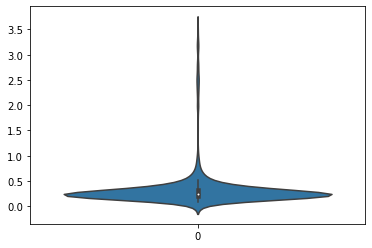

In [55]:
sns.violinplot(data=log_tpm_desc.loc['std'])

129 genes with somewhat high std in the uMax conditions?? Is this a problem?

## Save data frames

In [56]:
out_df = log_norm_uMax[['locus_tag']+samples]
out_df

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,-4.135351,-3.097173,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,-5.201540,-3.930131,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,-4.569572,-3.725040,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,-4.461081,-4.035474,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,-4.950035,-3.637451,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,-5.266254,-4.783630,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,-6.347307,-5.097497,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,-5.574703,-4.409324,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,-5.900466,-4.936556,-0.119272,-0.070209,-0.957250,-0.589300,-0.643860,-0.659820,-0.675180,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200


In [57]:
#out_df.to_csv('data/log_norm_uMax_indiv.csv',index=False)
out_df.to_csv('data/log_norm_uMax_indiv_lowExAdj.csv',index=False)

In [61]:
test_load = pd.read_csv('data/log_norm_uMax_indiv.csv')
test_load

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
0,EQU24_RS00005,-4.135351,-3.097173,-0.081618,0.013543,-1.005473,-0.565908,-0.868240,-0.861181,-0.860286,...,-0.423331,-0.413887,-0.465584,-0.361508,-0.366746,-0.629039,-0.374679,-0.430905,-0.773416,-0.326023
1,EQU24_RS00010,-5.201540,-3.930131,-0.213951,-0.115316,-0.677320,-0.569877,-1.119576,-1.054664,-1.167149,...,-0.179590,-0.182090,-0.479849,-0.274384,-0.346861,-0.306024,-0.388553,-0.356148,-0.679766,-0.170025
2,EQU24_RS00015,-4.569572,-3.725040,0.002850,-0.174656,-0.639651,-0.279816,-1.029608,-1.120098,-1.028006,...,-0.110156,0.045097,-0.655508,-0.483245,-0.609796,-0.620538,-0.578460,-0.572416,-0.801799,-0.181680
3,EQU24_RS00020,-4.461081,-4.035474,-0.130356,0.040745,-0.414605,-0.346534,-0.941858,-0.957353,-0.913985,...,0.082403,0.193677,-0.363136,-0.123069,-0.244925,-0.128927,-0.032470,-0.106898,-0.295688,-0.049523
4,EQU24_RS00025,-4.950035,-3.637451,0.659048,0.404700,-0.031390,0.291903,-0.787794,-0.640604,-0.818610,...,0.087352,0.059120,-0.455537,-0.375085,-0.325837,-0.267183,-0.280655,-0.400990,-0.192058,-0.235679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,-5.266254,-4.783630,0.233098,0.224448,-0.183783,-0.574685,-0.595432,-0.635461,-0.421307,...,-0.325961,0.050177,-2.102599,-1.773232,-2.098279,-1.530483,-2.007522,-2.169496,-2.149623,-1.858454
4209,EQU24_RS22140,-6.347307,-5.097497,-0.176841,-0.095379,-1.044380,-1.025606,-1.067681,-1.067686,-1.022445,...,-0.384478,-0.090839,-2.023112,-1.632494,-2.092212,-1.369533,-2.157892,-2.198065,-2.257044,-1.713649
4210,EQU24_RS22145,-5.574703,-4.409324,0.158857,0.144749,-0.784843,-0.435052,-0.574781,-0.535126,-0.518936,...,-0.572687,-0.441383,-2.694444,-2.569869,-2.842215,-2.911701,-3.232890,-2.884240,-3.006455,-2.753670
4211,EQU24_RS22150,-5.900466,-4.936556,-0.119272,-0.070209,-0.957250,-0.589300,-0.643860,-0.659820,-0.675180,...,-1.233437,-0.929800,-2.678648,-2.729526,-2.589713,-2.316455,-3.263189,-3.013563,-2.893263,-2.979200


In [62]:
test_load[test_load['locus_tag'].isin(no_tx_genes1)]

,locus_tag,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
122,EQU24_RS00625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.378244,0.000000,0.000000,1.972488
123,EQU24_RS00630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
124,EQU24_RS00635,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
125,EQU24_RS00640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.990679,0.904843,0.000000,0.969655,4.054800,2.180895,0.000000,4.494159
126,EQU24_RS00645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.973735,0.000000,0.000000
276,EQU24_RS01445,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.153554,0.000000,0.000000,2.147653,2.500359,0.000000,0.000000
526,EQU24_RS02735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
527,EQU24_RS02740,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
528,EQU24_RS02745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
529,EQU24_RS02750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## output other df's with some columns removed based on their experimental condition

In [73]:
sub3_cond_file = 'data/iMod_subtract3_conds.txt'
sub6_cond_file = 'data/iMod_subtract6_conds.txt'
sub10_cond_file = 'data/iMod_subtract10_conds.txt'

sub3_conds = [x.strip() for x in open(sub3_cond_file,'r').readlines()]
sub6_conds = [x.strip() for x in open(sub6_cond_file,'r').readlines()]
sub10_conds = [x.strip() for x in open(sub10_cond_file,'r').readlines()]

In [75]:
sub10_conds

['uMax', 'lowCH4', 'MeOH', 'NoCu', 'WithLanthanum']

In [77]:
sub3_samples = [x for x in samples if sample2condition[x] in sub3_conds]
sub6_samples = [x for x in samples if sample2condition[x] in sub6_conds]
sub10_samples = [x for x in samples if sample2condition[x] in sub10_conds]

print(len(sub3_samples))
print(len(sub6_samples))
print(len(sub10_samples))

80
60
35


In [80]:
sub3_out_df = out_df[['locus_tag']+sub3_samples]
sub6_out_df = out_df[['locus_tag']+sub6_samples]
sub10_out_df = out_df[['locus_tag']+sub10_samples]

sub10_out_df

,locus_tag,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,5GB1_FM14_TR1_tpm,5GB1_FM14_TR1_QC_tpm,5GB1_FM14_TR2_tpm,...,5GB1_FM23_TR3_tpm,5GB1_FM23_TR3_QC_tpm,5GB1_FM34_T0_TR1_QC_tpm,5GB1_FM40_T0_TR1_QC_tpm,5GB1_FM40_T0m_TR2_tpm,5GB1_vial_wLa_TR3_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm
0,EQU24_RS00005,-0.081618,0.013543,-0.868240,-0.861181,-0.860286,-0.810841,-0.466774,-0.532657,-0.730385,...,-0.991440,-0.951899,-0.428855,-0.427149,0.118846,-1.276807,-0.465584,-0.361508,-0.374679,-0.430905
1,EQU24_RS00010,-0.213951,-0.115316,-1.119576,-1.054664,-1.167149,-1.149678,-0.423026,-0.491606,-0.656658,...,-1.748025,-1.932886,-0.330648,0.086153,0.199454,-1.247595,-0.479849,-0.274384,-0.388553,-0.356148
2,EQU24_RS00015,0.002850,-0.174656,-1.029608,-1.120098,-1.028006,-0.996256,-0.586234,-0.612814,-0.872206,...,-1.125404,-0.932555,-0.348575,-0.487402,0.009681,-1.485636,-0.655508,-0.483245,-0.578460,-0.572416
3,EQU24_RS00020,-0.130356,0.040745,-0.941858,-0.957353,-0.913985,-0.980052,-0.512366,-0.460317,-0.569201,...,-2.209938,-2.238084,-0.586558,-0.282454,-0.115984,-1.190525,-0.363136,-0.123069,-0.032470,-0.106898
4,EQU24_RS00025,0.659048,0.404700,-0.787794,-0.640604,-0.818610,-0.839456,-0.307450,-0.396271,-0.361530,...,-1.651056,-1.796995,0.018610,0.065669,0.132672,-0.903486,-0.455537,-0.375085,-0.280655,-0.400990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,0.233098,0.224448,-0.595432,-0.635461,-0.421307,-0.361413,-0.451241,-0.424640,-0.821606,...,-1.903388,-2.074240,-0.624926,-0.436053,-0.291356,-2.343501,-2.102599,-1.773232,-2.007522,-2.169496
4209,EQU24_RS22140,-0.176841,-0.095379,-1.067681,-1.067686,-1.022445,-0.973605,-0.745638,-0.707825,-0.906936,...,-2.746737,-2.842895,-1.061803,-0.823244,-0.457175,-2.918860,-2.023112,-1.632494,-2.157892,-2.198065
4210,EQU24_RS22145,0.158857,0.144749,-0.574781,-0.535126,-0.518936,-0.496199,-0.494643,-0.590418,-0.778048,...,-1.883690,-1.865483,-1.106757,-1.056651,-0.176283,-1.992308,-2.694444,-2.569869,-3.232890,-2.884240
4211,EQU24_RS22150,-0.119272,-0.070209,-0.643860,-0.659820,-0.675180,-0.631363,-0.318578,-0.317851,-0.646912,...,-1.927047,-1.939577,-1.184993,-1.008883,-0.400203,-2.210819,-2.678648,-2.729526,-3.263189,-3.013563


In [81]:
sub3_out_df.to_csv('data/log_norm_uMax_indiv_lowExAdj_sub3.csv',index=False)
sub6_out_df.to_csv('data/log_norm_uMax_indiv_lowExAdj_sub6.csv',index=False)
sub10_out_df.to_csv('data/log_norm_uMax_indiv_lowExAdj_sub10.csv',index=False)

## older outputs and analysis

In [63]:
log_norm_uMax_meansT.to_csv('data/log_norm_uMax_cond_lowExAdj.csv')

In [33]:
test_load = pd.read_csv('data/log_norm_uMax_cond.csv',index_col=0)
test_load

,LanzaTech,MeOH,NO3_lowO2_slow_growth,NoCu,NoLanthanum,WT_control,WithLanthanum,aa3_KO,crotonic_acid,highCu,highO2_slow_growth,lowCH4,lowCu,lowO2_fast_growth,lowO2_slow_growth,medCu,slow_growth,uMax,unknown
locus_tag,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,-1.013763,-1.157002,-0.699488,-0.245719,-0.663704,-0.636041,-0.581897,-0.949697,-0.418609,-0.119127,0.303257,-0.755152,-0.292059,-0.551540,-2.575194,-0.207968,-0.507227,-9.621933e-16,-1.946206
EQU24_RS00010,-0.100261,-1.667787,-0.457145,-0.015014,-0.467179,-0.658847,-0.549306,-0.388786,-0.180840,0.398315,0.715060,-0.856915,0.031749,-0.476859,-3.016737,0.123448,-0.283960,-2.220446e-16,-2.302855
EQU24_RS00015,-1.519666,-0.880048,-0.674159,-0.275432,-0.561831,-1.197097,-0.755053,-1.540393,-0.032530,-0.021209,0.393465,-0.884468,-0.253642,-0.321760,-2.886444,-0.203934,-0.988652,-4.440892e-16,-1.988922
EQU24_RS00020,0.120852,-1.966703,-0.189125,-0.328332,-0.336594,-0.448681,-0.363220,-0.341633,0.138040,0.045912,0.159691,-0.734801,-0.208586,-0.543164,-2.879010,-0.115346,-0.117771,-6.661338e-16,-1.299803
EQU24_RS00025,-0.121187,-1.496034,-0.187394,0.072317,-0.172023,-0.420584,-0.483151,-0.523994,0.073236,0.032208,0.676371,-0.596527,0.089164,-0.553125,-2.847905,0.022974,-0.093229,-1.036208e-15,-1.302843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,-0.953107,-1.661306,-1.353638,-0.450778,-2.070373,-1.401285,-2.079270,-1.577950,-0.137892,0.012735,-0.775565,-0.567920,-0.424248,-0.312673,-3.711558,-0.073309,-1.560616,7.401487e-16,-1.624069
EQU24_RS22140,-0.276818,-2.243120,-1.275615,-0.780740,-2.047122,-1.323064,-2.186085,-1.239331,-0.237659,-0.326309,-0.963252,-0.925398,-0.570385,-0.393142,-4.199658,-0.339392,-1.358846,2.960595e-16,-2.681821
EQU24_RS22145,-1.513190,-1.496090,-1.463269,-0.779897,-2.758904,-1.303797,-2.674750,-1.566991,-0.507035,-0.216242,-0.891018,-0.597127,-0.563494,-0.272840,-3.666766,-0.248610,-1.274388,1.184238e-15,-2.617311


# add predicted transcriptional unit info from biocyc

In [34]:
bc_df = pd.read_csv('../modulome-workflow/data/5g_processed_data/5G_biocyc.txt',sep='\t')

In [35]:
loc2tu = bc_df[['Accession-1','Transcription Units']]
loc2tu.head(10)

,Accession-1,Transcription Units
0,EQU24_RS22155,rpmH // rnpA // yidD // yidC // mnmE
1,EQU24_RS22150,rpmH // rnpA // yidD // yidC // mnmE
2,EQU24_RS22145,rpmH // rnpA // yidD // yidC // mnmE
3,EQU24_RS22140,rpmH // rnpA // yidD // yidC // mnmE
4,EQU24_RS22135,rpmH // rnpA // yidD // yidC // mnmE
5,EQU24_RS22130,EQU24_RS22130
6,EQU24_RS22125,EQU24_RS22125
7,EQU24_RS22120,EQU24_RS22120
8,EQU24_RS22115,EQU24_RS22115
9,EQU24_RS22110,EQU24_RS22110


In [36]:
all_tu = loc2tu['Transcription Units'].values
tu_id = {}

i = 1
for x in all_tu:
    if x not in tu_id:
        tu_id[x] = i
        i += 1
        

In [37]:
tu_id

{'rpmH // rnpA // yidD // yidC // mnmE': 1,
 'EQU24_RS22130': 2,
 'EQU24_RS22125': 3,
 'EQU24_RS22120': 4,
 'EQU24_RS22115': 5,
 'EQU24_RS22110': 6,
 'EQU24_RS22105 // EQU24_RS22100 // EQU24_RS22095': 7,
 'EQU24_RS22090': 8,
 'EQU24_RS22085 // EQU24_RS22080 // EQU24_RS22075 // EQU24_RS22070 // EQU24_RS22065': 9,
 'EQU24_RS22060': 10,
 'EQU24_RS22055': 11,
 'EQU24_RS22050': 12,
 'EQU24_RS22045': 13,
 'EQU24_RS22040': 14,
 'zwf': 15,
 'pcp': 16,
 'EQU24_RS22025': 17,
 'EQU24_RS22020 // EQU24_RS22015 // EQU24_RS22010': 18,
 'EQU24_RS22005': 19,
 'EQU24_RS22000': 20,
 'EQU24_RS21995 // EQU24_RS21990 // EQU24_RS21985': 21,
 'metG': 22,
 'EQU24_RS21975': 23,
 'EQU24_RS21970': 24,
 'hflB // hflC // hflK': 25,
 'EQU24_RS21950': 26,
 'EQU24_RS21945': 27,
 'mgtE': 28,
 'EQU24_RS21935': 29,
 'EQU24_RS21930': 30,
 'EQU24_RS21925': 31,
 'EQU24_RS21920': 32,
 'EQU24_RS21915 // EQU24_RS21910 // EQU24_RS21905': 33,
 'EQU24_RS21900 // EQU24_RS21895': 34,
 'EQU24_RS21890': 35,
 'EQU24_RS21885': 36,
 'EQ

In [38]:
loc2tu['tu_id'] = loc2tu['Transcription Units'].apply(lambda x: tu_id[x])

<ipython-input-38-f7f0f6ae4b38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc2tu['tu_id'] = loc2tu['Transcription Units'].apply(lambda x: tu_id[x])


In [39]:
loc2tu

,Accession-1,Transcription Units,tu_id
0,EQU24_RS22155,rpmH // rnpA // yidD // yidC // mnmE,1
1,EQU24_RS22150,rpmH // rnpA // yidD // yidC // mnmE,1
2,EQU24_RS22145,rpmH // rnpA // yidD // yidC // mnmE,1
3,EQU24_RS22140,rpmH // rnpA // yidD // yidC // mnmE,1
4,EQU24_RS22135,rpmH // rnpA // yidD // yidC // mnmE,1
...,...,...,...
4426,EQU24_RS00025,EQU24_RS00030 // EQU24_RS00025,2827
4427,EQU24_RS00020,gyrB,2828
4428,EQU24_RS00015,recF,2829
4429,EQU24_RS00010,EQU24_RS00010,2830


In [40]:
loc2tu[loc2tu['Accession-1'] == 'EQU24_RS19315']

,Accession-1,Transcription Units,tu_id
568,EQU24_RS19315,EQU24_RS19315 // EQU24_RS19310 // EQU24_RS19305,383


In [41]:
loc2tu_dict = dict([(x,(y,z)) for x,y,z in loc2tu[['Accession-1','Transcription Units','tu_id']].values ])

In [42]:
loc2tu_dict['EQU24_RS19315']

('EQU24_RS19315 // EQU24_RS19310 // EQU24_RS19305', 383)

In [43]:
meta_df

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238
...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370


In [44]:
meta_df['tu_name'] = meta_df['locus_tag'].apply(lambda x: loc2tu_dict[x][0])
meta_df['tu_id'] = meta_df['locus_tag'].apply(lambda x: loc2tu_dict[x][1])

<ipython-input-44-0d915b5dafc1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['tu_name'] = meta_df['locus_tag'].apply(lambda x: loc2tu_dict[x][0])
<ipython-input-44-0d915b5dafc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['tu_id'] = meta_df['locus_tag'].apply(lambda x: loc2tu_dict[x][1])


In [46]:
meta_df.tail(15)

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id
4198,EQU24_RS22085,MoxR family ATPase,CDS,,NZ_CP035467.1,4987320,4988301,Derived by automated computational analysis us...,MSVDITNQSAMQKLKSFISKQIIGQDVLIERMLIALLSDGHILVEG...,982,EQU24_RS22085 // EQU24_RS22080 // EQU24_RS2207...,9
4199,EQU24_RS22090,POT family MFS transporter,CDS,,NZ_CP035467.1,4988781,4990122,Derived by automated computational analysis us...,MSQYRKNPLKTTELPSGIPFIIANEAAERFSYYGMRAILVVFMTQY...,1342,EQU24_RS22090,8
4200,EQU24_RS22095,hypothetical protein,CDS,,NZ_CP035467.1,4990226,4990799,Derived by automated computational analysis us...,MRLTIFILAISVSTIAHADAFKCVDSLGKTIYQAKPCDENHQSVQI...,574,EQU24_RS22105 // EQU24_RS22100 // EQU24_RS22095,7
4201,EQU24_RS22100,SDR family oxidoreductase,CDS,,NZ_CP035467.1,4990804,4991635,Derived by automated computational analysis us...,MSNSKIILITGCSSGIGYTTALALKQRGHRVIASARQQHDVDRLRQ...,832,EQU24_RS22105 // EQU24_RS22100 // EQU24_RS22095,7
4202,EQU24_RS22105,CPXCG motif-containing cysteine-rich protein,CDS,,NZ_CP035467.1,4991634,4991829,Derived by automated computational analysis us...,MFTDLEEISIQCPYCGETISLLLDIPSGSQCYYEDCSVCCSPIYVQ...,196,EQU24_RS22105 // EQU24_RS22100 // EQU24_RS22095,7
4203,EQU24_RS22110,hypothetical protein,CDS,,NZ_CP035467.1,4992034,4992421,Derived by automated computational analysis us...,MKFLRKVLLSLAIASSMGAIATPVMAESDPGRISYAPVEAIKLTSE...,388,EQU24_RS22110,6
4204,EQU24_RS22115,type II toxin-antitoxin system HicA family toxin,CDS,,NZ_CP035467.1,4993328,4993658,Derived by automated computational analysis us...,MSSQYPPLTCKEVKKILAYLGFVARPQKGKSHEQWVKEHDATLYKV...,331,EQU24_RS22115,5
4205,EQU24_RS22120,hypothetical protein,CDS,,NZ_CP035467.1,4993851,4994142,Derived by automated computational analysis us...,MKCYAEQEGDCWVAVCLNFNLAAQGDTYEEAKTKLESMIREYVHDA...,292,EQU24_RS22120,4
4206,EQU24_RS22125,DUF4102 domain-containing protein,CDS,,NZ_CP035467.1,4994218,4994407,Derived by automated computational analysis us...,MTLSVKDLRDAEPRDKQYKLTDREGLYVLVHPNGGKYFRYDYRFGG...,190,EQU24_RS22125,3
4207,EQU24_RS22130,,tRNA,,,4994558,4994648,,,91,EQU24_RS22130,2


In [47]:
meta_df.to_csv('data/5g_gene_info.tsv',sep='\t',index=False)

In [48]:
meta_reload = pd.read_csv('data/5g_gene_info.tsv',sep='\t')

In [50]:
meta_reload.fillna("")

,locus_tag,product,type,gene_symbol,locus,start_coord,end_coord,note,translation,gene_len,tu_name,tu_id
0,EQU24_RS00005,chromosomal replication initiator protein DnaA,CDS,dnaA,NZ_CP035467.1,0,1317,Derived by automated computational analysis us...,MSALWNNCLAKLENEISSSEFSTWIRPLQAIETDGQIKLLAPNRFV...,1318,dnaA,2831
1,EQU24_RS00010,DNA polymerase III subunit beta,CDS,,NZ_CP035467.1,1502,2603,Derived by automated computational analysis us...,MKYIINREQLLVPLQQIVSVIEKRQTMPILSNVLMVFRENTLVMTG...,1102,EQU24_RS00010,2830
2,EQU24_RS00015,DNA replication/repair protein RecF,CDS,recF,NZ_CP035467.1,3060,4140,Derived by automated computational analysis us...,MSLQKLDIFNVRNIRQASLQPSPGLNLIYGANASGKSSVLEAIFIL...,1081,recF,2829
3,EQU24_RS00020,DNA topoisomerase (ATP-hydrolyzing) subunit B,CDS,gyrB,NZ_CP035467.1,4185,6600,Derived by automated computational analysis us...,MSENIKQYDSTNIQVLKGLDAVRKRPGMYIGDTDDGTGLHHMVFEV...,2416,gyrB,2828
4,EQU24_RS00025,hypothetical protein,CDS,,NZ_CP035467.1,6825,7062,Derived by automated computational analysis us...,VKTTKYFLTTRMRPDREIIKDEWIQYVVRFPENEHIQFDGRIRRWA...,238,EQU24_RS00030 // EQU24_RS00025,2827
...,...,...,...,...,...,...,...,...,...,...,...,...
4208,EQU24_RS22135,tRNA uridine-5-carboxymethylaminomethyl(34) sy...,CDS,mnmE,NZ_CP035467.1,4994941,4996288,Derived by automated computational analysis us...,VDIGTNDTIAAIATPPGNGGVGIVRISGPAVSIIAAKLTDRPLPPR...,1348,rpmH // rnpA // yidD // yidC // mnmE,1
4209,EQU24_RS22140,membrane protein insertase YidC,CDS,yidC,NZ_CP035467.1,4996295,4997993,Derived by automated computational analysis us...,MDNIRFILVVTFAMLLYMLYDAWQIDYGPKREISVAQQMPQDLKED...,1699,rpmH // rnpA // yidD // yidC // mnmE,1
4210,EQU24_RS22145,membrane protein insertion efficiency factor YidD,CDS,yidD,NZ_CP035467.1,4997998,4998220,Derived by automated computational analysis us...,MRVLLIAIIKLYQYFISPLLGKNCRFYPSCSCYALEALHKHGAAQG...,223,rpmH // rnpA // yidD // yidC // mnmE,1
4211,EQU24_RS22150,ribonuclease P protein component,CDS,rnpA,NZ_CP035467.1,4998201,4998570,Derived by automated computational analysis us...,LTNKVFSFPPQLRLRKPSEYKKVFTGPVKSSDAYFTLLAVRNELDH...,370,rpmH // rnpA // yidD // yidC // mnmE,1


# Look at some correlations

In [58]:
i_log_tpm = log_tpm_df[['locus_tag']+samples].set_index('locus_tag')

In [59]:
i_log_tpm

,5GB1_ferm_Ack_QC_tpm,5GB1_ferm_WT_QC_tpm,5GB1_FM03_TR1_QC_tpm,5GB1_FM03_TR2_QC_tpm,5GB1_FM11_TR1_QC_tpm,5GB1_FM11_TR2_QC_tpm,5GB1_FM12_TR1_tpm,5GB1_FM12_TR1_QC_tpm,5GB1_FM12_TR2_tpm,5GB1_FM12_TR2_QC_tpm,...,5GB1_pA9_red_tpm,5GB1_pA9_yellow_tpm,5GB1C-5G-La-BR1_tpm,5GB1C-5G-La-BR2_tpm,5GB1C-5G-N-BR1_tpm,5GB1C-5G-N-BR2_tpm,5GB1C-JG15-La-BR1_tpm,5GB1C-JG15-La-BR2_tpm,5GB1C-JG15-N-BR1_tpm,5GB1C-JG15-N-BR2_tpm
locus_tag,,,,,,,,,,,,,,,,,,,,,
EQU24_RS00005,1.557289,2.595467,5.611022,5.706184,4.687167,5.126732,4.824401,4.831460,4.832355,4.881800,...,5.269309,5.278753,5.227056,5.331132,5.325894,5.063601,5.317961,5.261735,4.919225,5.366617
EQU24_RS00010,0.694019,1.965427,5.681608,5.780242,5.218239,5.325682,4.775983,4.840894,4.728410,4.745881,...,5.715969,5.713469,5.415710,5.621175,5.548698,5.589535,5.507006,5.539411,5.215793,5.725534
EQU24_RS00015,0.511484,1.356015,5.083905,4.906399,4.441404,4.801239,4.051447,3.960957,4.053050,4.084800,...,4.970899,5.126152,4.425547,4.597810,4.471259,4.460518,4.502595,4.508639,4.279256,4.899375
EQU24_RS00020,1.682610,2.108217,6.013335,6.184436,5.729086,5.797156,5.201833,5.186338,5.229706,5.163639,...,6.226094,6.337368,5.780555,6.020622,5.898766,6.014764,6.111221,6.036793,5.848002,6.094168
EQU24_RS00025,0.616102,1.928686,6.225185,5.970837,5.534747,5.858040,4.778343,4.925533,4.747527,4.726681,...,5.653489,5.625257,5.110600,5.191052,5.240299,5.298954,5.285482,5.165147,5.374079,5.330458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EQU24_RS22135,1.207991,1.690615,6.707343,6.698693,6.290463,5.899560,5.878813,5.838784,6.052938,6.112833,...,6.148284,6.524422,4.371646,4.701013,4.375966,4.943763,4.466723,4.304749,4.324623,4.615791
EQU24_RS22140,2.398236,3.648046,8.568702,8.650164,7.701163,7.719938,7.677862,7.677857,7.723098,7.771938,...,8.361065,8.654704,6.722431,7.113049,6.653331,7.376010,6.587651,6.547478,6.488499,7.031894
EQU24_RS22145,3.232626,4.398006,8.966186,8.952079,8.022487,8.372278,8.232548,8.272203,8.288393,8.311130,...,8.234642,8.365946,6.112885,6.237461,5.965114,5.895628,5.574439,5.923089,5.800874,6.053659


In [97]:
sample_meta_df = sample_meta_df[sample_meta_df['sample'].isin(samples)]

In [98]:
sample_meta_df

,exp_theme,exp_condition,#sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,sample
0,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_Ack_QC,ferm_Ack_QC,Melissa needs to provide details (acetate kinase),2,0,0,3,0,0,0,0,outlier sample,5GB1_ferm_Ack_QC_tpm
1,lowO2_slow_growth,lowO2_slow_growth,5GB1_ferm_WT_QC,ferm_WT_QC,Melissa needs to provide details,2,0,0,3,0,0,0,0,outlier sample,5GB1_ferm_WT_QC_tpm
2,uMax,uMax,5GB1_FM03_TR1_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,5GB1_FM03_TR1_QC_tpm
3,uMax,uMax,5GB1_FM03_TR2_QC,uMax_QC,"Fermentor run 3, uMax though close to O2 limit...",2,1,0,3,0,2,0,1,NaN,5GB1_FM03_TR2_QC_tpm
4,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM11_TR1_QC,lowO2_QC,"Fermentor run 11, O2 limited, QC",2,0,0,3,0,1,0,1,NaN,5GB1_FM11_TR1_QC_tpm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Lanthanum,NoLanthanum,5GB1C-5G-N-BR2,NoLa_rep2,Vial sample in mid- to late-exponential phase,2,1,0,3,0,2,1,1,NaN,5GB1C-5G-N-BR2_tpm
98,Lanthanum,WithLanthanum,5GB1C-JG15-La-BR1,deltaTBDT_La_rep1,Vial sample in mid- to late-exponential phase,2,1,0,3,1,2,1,1,NaN,5GB1C-JG15-La-BR1_tpm
99,Lanthanum,WithLanthanum,5GB1C-JG15-La-BR2,deltaTBDT_La_rep2,Vial sample in mid- to late-exponential phase,2,1,0,3,1,2,1,1,NaN,5GB1C-JG15-La-BR2_tpm
100,Lanthanum,NoLanthanum,5GB1C-JG15-N-BR1,deltaTBDT_NoLa_rep1,Vial sample in mid- to late-exponential phase,2,1,0,3,0,2,1,1,NaN,5GB1C-JG15-N-BR1_tpm


In [60]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path
from scipy import stats
from tqdm.notebook import tqdm

In [107]:
def corr_check(tpm_df,meta_df):

    rep_corrs = {}
    rand_corrs = {}

    num_comparisons = len(meta_df)*(len(meta_df)-1)/2

    #for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed_step4.sample_id,2),total=num_comparisons):
    for exp1,exp2 in tqdm(itertools.combinations(meta_df['sample'],2),total=num_comparisons):
        #print(exp1,exp2)
        exp1_cond = meta_df[meta_df['sample'] == exp1]['exp_condition'].values[0]
        exp2_cond = meta_df[meta_df['sample'] == exp2]['exp_condition'].values[0]
        #print(exp1_full,exp2_full)
        #if DF_metadata_passed_step4.loc[exp1,'full_name'] == DF_metadata_passed_step4.loc[exp2,'full_name']:
        if exp1_cond == exp2_cond:
            p = stats.pearsonr(tpm_df[exp1],tpm_df[exp2])[0]
            rep_corrs[(exp1,exp2)] = p
            if p<0.9:
                print(f"Same: ({exp1_cond},{exp2_cond}) for {exp1} vs {exp2}")
                print("Should be close: p=",p)
                print()
        else:
            p = stats.pearsonr(tpm_df[exp1],tpm_df[exp2])[0]
            rand_corrs[(exp1,exp2)] = p

#             if p>0.8:
#                 print(f"Diff: ({exp1_full},{exp2_full}) for {exp1} vs {exp2}")
#                 print("Should be far but p=",p)
#                 print()

    return rep_corrs,rand_corrs

In [108]:
rep_corrs, rand_corrs = corr_check(i_log_tpm,sample_meta_df)

  0%|          | 0/4753.0 [00:00<?, ?it/s]

Same: (lowO2_slow_growth,lowO2_slow_growth) for 5GB1_ferm_Ack_QC_tpm vs 5GB1_FM69_t2_TR1_tpm
Should be close: p= 0.7124059909090412

Same: (lowO2_slow_growth,lowO2_slow_growth) for 5GB1_ferm_WT_QC_tpm vs 5GB1_FM69_t2_TR1_tpm
Should be close: p= 0.7517483021450406

Same: (uMax,uMax) for 5GB1_FM03_TR1_QC_tpm vs 5GB1_FM20_TR1_QC_tpm
Should be close: p= 0.8969468508915699

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-5G-La-BR1_tpm
Should be close: p= 0.8776936800539448

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-5G-La-BR2_tpm
Should be close: p= 0.8801487063965939

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-JG15-La-BR1_tpm
Should be close: p= 0.8374718232169176

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-JG15-La-BR2_tpm
Should be close: p= 0.8430146513781279

Same: (NoLanthanum,NoLanthanum) for 5GB1_vial_woLa_TR2_tpm vs 5GB1C-5G-N-BR1_tpm
Should be close: p= 0.8948595046810915

Sam

Median Pearson R between replicates: 0.98


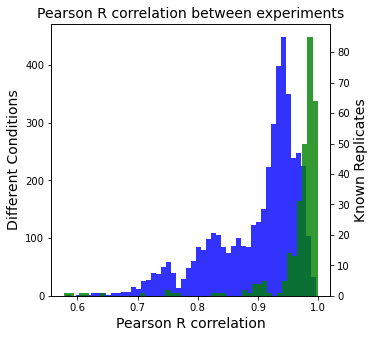

In [109]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
# ax2.hist(rep_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='green',linewidth=0)
# ax.hist(rand_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='blue',linewidth=0)
ax2.hist(rep_corrs.values(),bins=50,alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [112]:
better_sample_meta_df = sample_meta_df[sample_meta_df['exp_condition'].isin(conditions)]

In [113]:
better_sample_meta_df.shape

(86, 15)

In [114]:
rep_corrs, rand_corrs = corr_check(i_log_tpm,better_sample_meta_df)

  0%|          | 0/3655.0 [00:00<?, ?it/s]

Same: (uMax,uMax) for 5GB1_FM03_TR1_QC_tpm vs 5GB1_FM20_TR1_QC_tpm
Should be close: p= 0.8969468508915699

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-5G-La-BR1_tpm
Should be close: p= 0.8776936800539448

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-5G-La-BR2_tpm
Should be close: p= 0.8801487063965939

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-JG15-La-BR1_tpm
Should be close: p= 0.8374718232169176

Same: (WithLanthanum,WithLanthanum) for 5GB1_vial_wLa_TR3_tpm vs 5GB1C-JG15-La-BR2_tpm
Should be close: p= 0.8430146513781279

Same: (NoLanthanum,NoLanthanum) for 5GB1_vial_woLa_TR2_tpm vs 5GB1C-5G-N-BR1_tpm
Should be close: p= 0.8948595046810915

Same: (NoLanthanum,NoLanthanum) for 5GB1_vial_woLa_TR2_tpm vs 5GB1C-5G-N-BR2_tpm
Should be close: p= 0.8869628083144301

Same: (NoLanthanum,NoLanthanum) for 5GB1_vial_woLa_TR2_tpm vs 5GB1C-JG15-N-BR1_tpm
Should be close: p= 0.8933903435399703

Same: (NoLanthanum,NoLan

Median Pearson R between replicates: 0.98


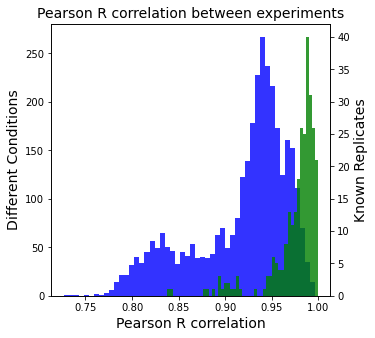

In [115]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
# ax2.hist(rep_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='green',linewidth=0)
# ax.hist(rand_corrs.values(),bins=50,range=(-0.2,1),alpha=0.8,color='blue',linewidth=0)
ax2.hist(rep_corrs.values(),bins=50,alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=50,alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [117]:
better_sample_meta_df[better_sample_meta_df['include?']==0]

,exp_theme,exp_condition,#sample,shortd,longd,carbon_source,oxygen_level,nitrate_level,copper_level,lanthanum_level,growth_rate,growth_mode,include?,notes,sample
14,MeOH,MeOH,5GB1_FM18_TR1_QC,MeOH_QC,"Fermentor run 18, methanol",0,1,0,3,0,2,0,0,why ex?,5GB1_FM18_TR1_QC_tpm
19,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM19_TR1,lowO2,"Fermentor run 19, O2 limited",2,0,0,3,0,1,0,0,why ex?,5GB1_FM19_TR1_tpm
36,lowO2_fast_growth,lowO2_fast_growth,5GB1_FM22_TR3,lowO2,"Fermentor run 22, O2 limited",2,0,0,3,0,1,0,0,why ex?,5GB1_FM22_TR3_tpm
57,Cu,lowCu,5GB1_FM40_T20m_TR2_QC,CuT20m_QC,"Fermentor run 40, Cu transition, T20m (after Cu)",2,1,0,1,0,1,0,0,why ex?,5GB1_FM40_T20m_TR2_QC_tpm
75,LanzaTech,LanzaTech,5GB1_LTrecycle_TR1,LTrecycle,LanzaTech Cell recycle,-1,-1,-1,-1,-1,-1,-1,0,other exp,5GB1_LTrecycle_TR1_tpm
76,LanzaTech,LanzaTech,5GB1_LTrecycle_TR1_QC,LTrecycle_QC,LanzaTech Cell recycle,-1,-1,-1,-1,-1,-1,-1,0,other exp,5GB1_LTrecycle_TR1_QC_tpm
84,aa3_KO,aa3_KO,5GB1_FM_85_TR1,5GB1_FM_85,Fermentor run 85,2,1,0,3,0,2,0,0,other exp,5GB1_FM_85_TR1_tpm
85,aa3_KO,aa3_KO,5GB1_FM_85_TR2,5GB1_FM_85,Fermentor run 85,2,1,0,3,0,2,0,0,other exp,5GB1_FM_85_TR2_tpm
92,crotonic_acid,crotonic_acid,5GB1_pA9_red,5GB1_pA9,Vial sample producing crotonic acid,2,1,0,3,0,2,1,0,other exp,5GB1_pA9_red_tpm
93,crotonic_acid,crotonic_acid,5GB1_pA9_yellow,5GB1_pA9,Vial sample producing crotonic acid,2,1,0,3,0,2,1,0,other exp,5GB1_pA9_yellow_tpm
